# **Membuat program jaringan saraf tiruan menggunakan TensorFlow yang mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.**

In [1]:
# mengimport library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# cek versi TensorFlow yang digunakan (harus versi 2 ke atas)
print(tf.__version__)

2.3.0


In [3]:
# mempersiapkan data yang akan digunakan
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-20 01:09:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.47MB/s    in 73s     

2020-10-20 01:10:52 (4.25 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# mengekstrak data yang sebelumnya diunduh
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# mengecek hasil data yang sebelumnya diekstrak
os.listdir('/tmp/rockpaperscissors')

['scissors', 'paper', 'rps-cv-images', 'rock', 'README_rpc-cv-images.txt']

In [6]:
pip install split-folders # menginstall split-folders yang akan digunakan untuk membantu memecah data

In [7]:
# memecah data menggunakan split-folders serta membuat direktori train dan validation  
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/images", ratio=(.6, .4))
base_dir='/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3574.52 files/s]


In [8]:
# mengecek direktori train
os.listdir('/tmp/images/train')

['scissors', 'paper', 'rock']

In [9]:
# mengecek direktori validation
os.listdir('/tmp/images/val')

['scissors', 'paper', 'rock']

In [10]:
# proses augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [11]:
# mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32,
        class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32,
        class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
# membangun arsitektur Convolutional Neural Network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
# Memanggil fungsi compile pada objek model, serta menentukan loss function dan optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
# Inisialisasi Callback untuk menghentikan training jika terindikasi akan overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      self.model.stop_training = True
      print("\nTraining dihentikan karena terindikasi akan overfitting")

callbacks = myCallback()

In [15]:
# melatih model menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
        callbacks=[callbacks] # menggunakan callback yang sebelumnya telah diinisialisasi sebelumnya
)

Epoch 1/20
25/25 - 39s - loss: 1.1043 - accuracy: 0.4238 - val_loss: 0.9354 - val_accuracy: 0.6250
Epoch 2/20
25/25 - 38s - loss: 0.6296 - accuracy: 0.7788 - val_loss: 0.3277 - val_accuracy: 0.9062
Epoch 3/20
25/25 - 38s - loss: 0.3602 - accuracy: 0.8650 - val_loss: 0.2338 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 38s - loss: 0.3065 - accuracy: 0.8838 - val_loss: 0.4912 - val_accuracy: 0.8562
Epoch 5/20
25/25 - 38s - loss: 0.2244 - accuracy: 0.9250 - val_loss: 0.3668 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 38s - loss: 0.1921 - accuracy: 0.9312 - val_loss: 0.2183 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 38s - loss: 0.1764 - accuracy: 0.9413 - val_loss: 0.2072 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 38s - loss: 0.1381 - accuracy: 0.9500 - val_loss: 0.1282 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 38s - loss: 0.1049 - accuracy: 0.9575 - val_loss: 0.1505 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 38s - loss: 0.1565 - accuracy: 0.9450 - val_loss: 0.1393 - val_accuracy: 0.9500
Epoch 11/

Saving 138Tx9KlEfheT3uB.png to 138Tx9KlEfheT3uB.png
138Tx9KlEfheT3uB.png
Scissors


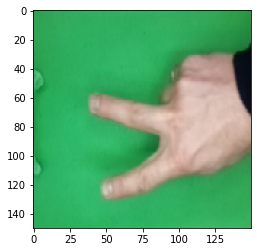

In [17]:
# memprediksi gambar yang diupload
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes = classes.tolist()
  result = classes[0]
  
  print(fn)
  if result[0]==1.0:
    print('Paper')
  elif result[1]==1.0:
    print('Rock')
  elif result[2]==1.0:
    print('Scissors')
  else:
    print('Error')